In [87]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
df=pd.read_csv("income.csv" )
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


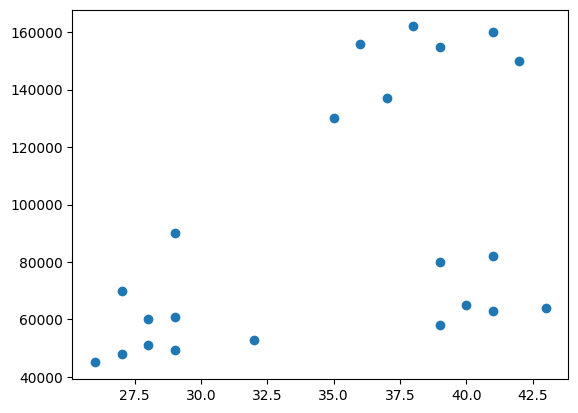

In [89]:
plt.scatter(df.Age,df["Income($)"])

In [90]:
km=KMeans(n_clusters=3)

In [91]:
predict=km.fit_predict(df[["Age","Income($)"]])

In [92]:
df["predict"]=predict

In [93]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [94]:
df.head()

,Name,Age,Income($),predict
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [95]:
df0=df[df['predict']==0]
df1=df[df['predict']==1]
df2=df[df['predict']==2]

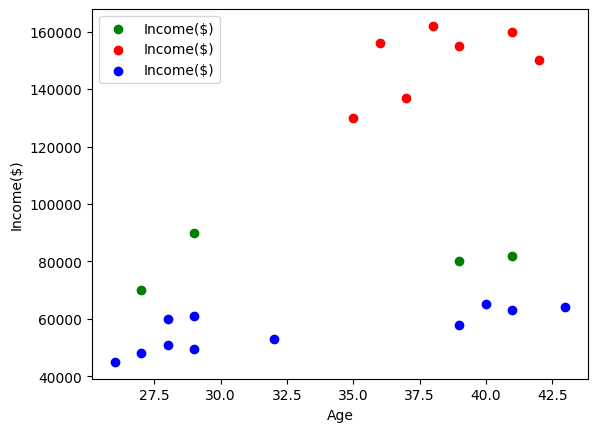

In [96]:
plt.scatter(df0.Age,df0["Income($)"],color='green',label='Income($)')
plt.scatter(df1.Age,df1["Income($)"],color='red',label='Income($)')
plt.scatter(df2.Age,df2["Income($)"],color='blue',label='Income($)')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [97]:
scale=MinMaxScaler()
scale.fit(df[['Income($)']])
df[["Income($)"]]=scale.transform(df[["Income($)"]])
scale.fit(df[['Age']])
df[["Age"]]=scale.transform(df[["Age"]])

In [98]:
df.head()

,Name,Age,Income($),predict
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [99]:
km=KMeans(n_clusters=3)
predict=km.fit_predict(df[["Age","Income($)"]])
df["predict"]=predict

In [100]:
km.cluster_centers_


array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [101]:
df0=df[df['predict']==0]
df1=df[df['predict']==1]
df2=df[df['predict']==2]

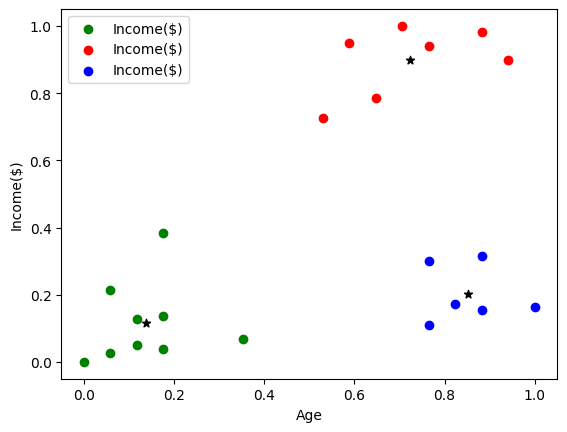

In [122]:
plt.scatter(df0.Age,df0["Income($)"],color='green',label='Income($)')
plt.scatter(df1.Age,df1["Income($)"],color='red',label='Income($)')
plt.scatter(df2.Age,df2["Income($)"],color='blue',label='Income($)')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="*",color="black",label="centriod")

In [118]:
import numpy as np
sse=[]
k_val=np.arange(1,10)
for k in k_val:
    ke=KMeans(n_clusters=k)
    ke.fit(df[["Age","Income($)"]])
    sse.append(ke.inertia_)

In [119]:
sse

[5.434011511988178,
 2.3456144914725936,
 0.4750783498553096,
 0.40365551195705296,
 0.2963623258321304,
 0.23142796736163201,
 0.21242325078867247,
 0.13781880133764024,
 0.11056185254866237]

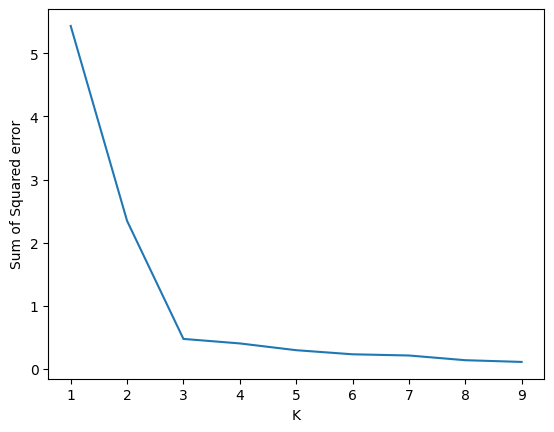

In [120]:
plt.xlabel("K")
plt.ylabel("Sum of Squared error")
plt.plot(kv,sse)